In [12]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split

from components import data_handling, glrp_scipy,nn_cnn_models
from lib import models, graph, coarsening

# from sklearn.model_selection import StratifiedKFold

import time

In [13]:
path_to_feature_val = "./data/GE_PPI/GEO_HG_PPI.csv"
path_to_feature_graph = "./data/GE_PPI/HPRD_PPI.csv"
path_to_labels = "./data/GE_PPI/labels_GEO_HG.csv"

DP = data_handling.DataPreprocessor(path_to_feature_values=path_to_feature_val, path_to_feature_graph=path_to_feature_graph,
                                    path_to_labels=path_to_labels)
X = DP.get_feature_values_as_np_array()  # gene expression
A = csr_matrix(DP.get_adj_feature_graph_as_np_array().astype(np.float32))  # adjacency matrix of the PPI network
y = DP.get_labels_as_np_array()  # labels

print("GE data, X shape: ", X.shape)
print("Labels, y shape: ", y.shape)
print("PPI network adjacency matrix, A shape: ", A.shape)

KeyboardInterrupt: 

In [ ]:
Z = DP.get_data_frame_for_mRMR_method()

14.2013687432213


In [ ]:
#Z.to_csv("combine.csv")

     class      RPL41     EEF1A1       TPT1     RPL23A        UBC       RPS2  \
0        1  14.027973  13.321452  13.383143  13.752067  13.459339  13.672751   
1        1  13.892742  14.027973  13.431648  13.459339  13.155470  13.254169   
2        1  14.201369  13.892742  13.340611  13.752067  13.269927  13.238841   
3        1  14.201369  13.615073  13.269927  13.672751  13.303665  13.254169   
4        1  14.201369  13.340611  13.321452  13.948924  12.794457  12.961327   
..     ...        ...        ...        ...        ...        ...        ...   
964      0  13.181601  14.027973  13.254169  12.727708  13.459339  13.195257   
965      0  13.615073  13.752067  13.209737  12.787052  13.491293  13.142948   
966      0  13.892742  14.027973  13.948924  13.072628  13.524566  13.321452   
967      0  13.795728  13.948924  13.752067  13.340611  13.321452  13.303665   
968      0  14.027973  14.201369  13.795728  13.303665  12.802188  13.181601   

          ACTB      HUWE1      RPS4X  .

In [ ]:
Z

,class,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,...,PTH,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN
0,1,14.027973,13.321452,13.383143,13.752067,13.459339,13.672751,13.406419,13.118830,12.833613,...,6.115904,6.038711,6.091257,6.254978,5.998992,6.029053,6.212970,6.104444,5.913941,6.074499
1,1,13.892742,14.027973,13.431648,13.459339,13.155470,13.254169,13.406419,12.970659,12.889865,...,6.254749,5.954199,6.114698,6.058185,6.137693,6.246585,6.118346,5.988550,6.080971,5.946836
2,1,14.201369,13.892742,13.340611,13.752067,13.269927,13.238841,13.029795,12.925001,13.040590,...,6.119285,6.149428,6.084118,6.082904,6.074499,6.236203,6.092384,6.060823,6.046823,6.003550
3,1,14.201369,13.615073,13.269927,13.672751,13.303665,13.254169,13.040590,13.009293,13.107198,...,6.183513,5.993970,6.058948,6.101276,6.007939,6.058948,6.149798,6.094918,6.069102,5.963548
4,1,14.201369,13.340611,13.321452,13.948924,12.794457,12.961327,12.520043,12.756682,12.749382,...,6.218246,6.167575,6.162198,6.170033,6.127875,6.149798,6.169692,6.051885,6.065562,6.094638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0,13.181601,14.027973,13.254169,12.727708,13.459339,13.195257,13.072628,12.614945,12.567009,...,6.186060,6.164721,6.133065,6.188308,6.017090,6.097989,5.848466,6.126104,6.019571,6.000490
965,0,13.615073,13.752067,13.209737,12.787052,13.491293,13.142948,13.361660,12.506427,12.573794,...,6.222049,6.080341,6.119285,6.160764,6.167575,6.068405,6.086544,6.115904,5.968926,5.878205
966,0,13.892742,14.027973,13.948924,13.072628,13.524566,13.321452,13.224023,13.238841,13.061771,...,6.236457,6.028525,6.095766,6.282612,6.094065,6.064087,6.061929,6.147090,5.894238,5.933333
967,0,13.795728,13.948924,13.752067,13.340611,13.321452,13.303665,13.061771,13.286573,13.084144,...,6.188614,6.190470,6.173496,6.058948,6.166862,6.024128,6.005051,6.132191,6.048914,6.035844


In [ ]:
Z.describe()

,class,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,...,PTH,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,...,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,0.405573,13.790568,13.745996,13.489918,13.324412,13.309062,13.295899,13.267735,12.980062,12.943042,...,6.146423,6.144545,6.133574,6.131785,6.113419,6.108516,6.097689,6.067521,6.048654,6.029671
std,0.491256,0.271289,0.308646,0.289099,0.311042,0.311160,0.222352,0.408424,0.265449,0.297082,...,0.085381,0.081435,0.124446,0.094053,0.097544,0.103904,0.162171,0.086771,0.073406,0.098092
min,0.000000,12.352837,11.174998,12.272058,12.419793,12.299067,12.649483,11.342601,11.975916,11.689999,...,5.905356,5.878205,5.878205,5.848466,5.848466,5.848466,5.848466,5.848466,5.848466,5.848466
25%,0.000000,13.672751,13.563829,13.303665,13.095805,13.130437,13.155470,13.019293,12.817640,12.771580,...,6.092384,6.090678,6.053485,6.066284,6.046823,6.047659,5.993970,6.007939,6.000490,5.966312
50%,0.000000,13.841218,13.795728,13.491293,13.303665,13.286573,13.269927,13.254169,12.999661,12.970659,...,6.145895,6.136032,6.106006,6.133906,6.109072,6.098524,6.061189,6.064821,6.043412,6.015840
75%,1.000000,14.027973,13.948924,13.711606,13.563829,13.491293,13.406419,13.563829,13.155470,13.142948,...,6.199919,6.190776,6.174173,6.194161,6.167575,6.159633,6.151348,6.116870,6.092954,6.080341
max,1.000000,14.201369,14.201369,14.201369,14.027973,14.201369,14.201369,14.201369,13.752067,13.795728,...,6.501198,6.599013,6.929267,6.589432,6.538438,7.723586,7.359462,6.455317,6.420893,6.549919


In [ ]:
Z_positive = Z[Z['class']==1]
Z_positive

,class,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,...,PTH,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN
0,1,14.027973,13.321452,13.383143,13.752067,13.459339,13.672751,13.406419,13.118830,12.833613,...,6.115904,6.038711,6.091257,6.254978,5.998992,6.029053,6.212970,6.104444,5.913941,6.074499
1,1,13.892742,14.027973,13.431648,13.459339,13.155470,13.254169,13.406419,12.970659,12.889865,...,6.254749,5.954199,6.114698,6.058185,6.137693,6.246585,6.118346,5.988550,6.080971,5.946836
2,1,14.201369,13.892742,13.340611,13.752067,13.269927,13.238841,13.029795,12.925001,13.040590,...,6.119285,6.149428,6.084118,6.082904,6.074499,6.236203,6.092384,6.060823,6.046823,6.003550
3,1,14.201369,13.615073,13.269927,13.672751,13.303665,13.254169,13.040590,13.009293,13.107198,...,6.183513,5.993970,6.058948,6.101276,6.007939,6.058948,6.149798,6.094918,6.069102,5.963548
4,1,14.201369,13.340611,13.321452,13.948924,12.794457,12.961327,12.520043,12.756682,12.749382,...,6.218246,6.167575,6.162198,6.170033,6.127875,6.149798,6.169692,6.051885,6.065562,6.094638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1,13.711606,13.795728,13.431648,13.040590,13.254169,13.383143,13.029795,12.779311,12.677959,...,6.130051,6.070490,6.003550,6.069783,6.025232,6.099649,5.993970,6.015840,5.942645,5.946836
389,1,13.524566,13.563829,13.406419,12.706262,13.168061,13.051213,13.155470,12.979887,12.473101,...,6.210751,6.129628,6.017090,6.211332,6.118804,6.120654,5.933333,6.082257,6.048492,6.022981
390,1,13.524566,14.027973,13.948924,12.898489,13.321452,13.303665,13.383143,13.286573,12.720564,...,6.170033,6.110528,6.092384,6.196576,5.950651,6.032803,6.080971,6.020725,6.085660,5.938162
391,1,13.948924,13.672751,13.615073,13.340611,13.841218,13.254169,13.431648,12.961327,12.594311,...,6.235671,6.120178,6.109072,6.104965,6.061559,6.173833,5.894238,6.051885,5.998992,5.848466


In [ ]:
Z_positive.describe()

,class,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,...,PTH,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN
count,393.0,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,...,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,1.0,13.727711,13.687459,13.428059,13.279945,13.292189,13.283990,13.265984,12.955256,12.888962,...,6.150087,6.136710,6.127139,6.137423,6.110348,6.115285,6.095052,6.062082,6.043620,6.024962
std,0.0,0.306113,0.331220,0.295628,0.328954,0.326402,0.250750,0.406225,0.287044,0.311638,...,0.086650,0.078193,0.115161,0.092018,0.094195,0.121025,0.163738,0.083300,0.071097,0.103365
min,1.0,12.352837,11.174998,12.272058,12.473101,12.406460,12.649483,12.002270,11.975916,12.015565,...,5.905356,5.878205,5.950651,5.878205,5.878205,5.848466,5.848466,5.848466,5.848466,5.848466
25%,1.0,13.491293,13.491293,13.254169,13.029795,13.095805,13.118830,13.019293,12.794457,12.677959,...,6.099077,6.085357,6.052699,6.082257,6.046823,6.052699,5.986689,6.005051,5.997344,5.954199
50%,1.0,13.795728,13.711606,13.406419,13.238841,13.269927,13.254169,13.269927,12.979887,12.889865,...,6.153303,6.131758,6.102332,6.141441,6.105495,6.101276,6.064821,6.059696,6.040628,6.009279
75%,1.0,13.948924,13.948924,13.615073,13.524566,13.491293,13.431648,13.524566,13.118830,13.084144,...,6.201722,6.186060,6.166862,6.196126,6.153303,6.167928,6.165441,6.110528,6.085963,6.077807
max,1.0,14.201369,14.201369,14.201369,14.027973,14.027973,14.201369,14.201369,13.752067,13.752067,...,6.501198,6.379914,6.929267,6.589432,6.523945,7.723586,7.359462,6.423845,6.287931,6.549919


In [72]:
pos_agg = Z_positive.agg(['mean', 'min','max'])
pos_agg

,class,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,...,PTH,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN
mean,1.0,13.727711,13.687459,13.428059,13.279945,13.292189,13.283990,13.265984,12.955256,12.888962,...,6.150087,6.136710,6.127139,6.137423,6.110348,6.115285,6.095052,6.062082,6.043620,6.024962
min,1.0,12.352837,11.174998,12.272058,12.473101,12.406460,12.649483,12.002270,11.975916,12.015565,...,5.905356,5.878205,5.950651,5.878205,5.878205,5.848466,5.848466,5.848466,5.848466,5.848466
max,1.0,14.201369,14.201369,14.201369,14.027973,14.027973,14.201369,14.201369,13.752067,13.752067,...,6.501198,6.379914,6.929267,6.589432,6.523945,7.723586,7.359462,6.423845,6.287931,6.549919


In [ ]:
Z_negative = Z[Z['class']==0]
Z_negative

,class,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,...,PTH,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN
393,0,13.711606,13.672751,13.431648,13.892742,13.224023,13.406419,12.540213,13.072628,12.787052,...,6.106528,6.162198,6.181207,6.272254,6.141026,6.032803,6.169015,6.110285,6.026326,6.130476
394,0,14.201369,13.752067,13.155470,13.238841,13.130437,13.431648,12.889865,12.787052,12.656460,...,6.299613,6.129184,6.133906,6.103404,6.135185,6.191088,6.198697,6.034870,5.971536,6.063385
395,0,14.027973,13.563829,12.970659,13.286573,13.224023,13.361660,13.615073,12.889865,12.706262,...,6.254978,6.108043,6.052699,6.199919,6.172822,6.233632,6.337004,6.065562,6.032803,6.066284
396,0,14.201369,13.892742,13.168061,13.672751,12.706262,13.142948,12.406460,12.817640,13.040590,...,6.360312,6.106778,6.150191,6.194161,5.963548,6.157408,6.239635,6.038711,6.106778,6.147090
397,0,14.201369,13.524566,13.563829,13.752067,13.224023,13.321452,13.084144,13.155470,13.269927,...,6.133065,6.235671,6.058185,6.207609,6.009279,6.036338,6.099649,6.030657,5.946836,5.938162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0,13.181601,14.027973,13.254169,12.727708,13.459339,13.195257,13.072628,12.614945,12.567009,...,6.186060,6.164721,6.133065,6.188308,6.017090,6.097989,5.848466,6.126104,6.019571,6.000490
965,0,13.615073,13.752067,13.209737,12.787052,13.491293,13.142948,13.361660,12.506427,12.573794,...,6.222049,6.080341,6.119285,6.160764,6.167575,6.068405,6.086544,6.115904,5.968926,5.878205
966,0,13.892742,14.027973,13.948924,13.072628,13.524566,13.321452,13.224023,13.238841,13.061771,...,6.236457,6.028525,6.095766,6.282612,6.094065,6.064087,6.061929,6.147090,5.894238,5.933333
967,0,13.795728,13.948924,13.752067,13.340611,13.321452,13.303665,13.061771,13.286573,13.084144,...,6.188614,6.190470,6.173496,6.058948,6.166862,6.024128,6.005051,6.132191,6.048914,6.035844


In [15]:
Z_negative.describe()

,class,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,...,PTH,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN
count,576.0,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,...,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,0.0,13.833455,13.785935,13.532124,13.354751,13.320574,13.304025,13.268930,12.996986,12.979940,...,6.143923,6.149891,6.137965,6.127938,6.115514,6.103898,6.099488,6.071232,6.052088,6.032883
std,0.0,0.235530,0.285729,0.276987,0.294663,0.300062,0.200510,0.410266,0.248484,0.281083,...,0.084488,0.083218,0.130319,0.095304,0.099792,0.090204,0.161210,0.088942,0.074807,0.094281
min,0.0,12.553796,12.366211,12.540213,12.419793,12.299067,12.706262,11.342601,12.137889,11.689999,...,5.905356,5.938162,5.878205,5.848466,5.848466,5.878205,5.848466,5.848466,5.848466,5.848466
25%,0.0,13.711606,13.615073,13.340611,13.155470,13.142948,13.168061,13.009293,12.833613,12.825523,...,6.089963,6.093506,6.055385,6.058852,6.045773,6.044050,5.995633,6.009279,6.002069,5.973967
50%,0.0,13.892742,13.841218,13.524566,13.331031,13.303665,13.286573,13.238841,13.009293,13.009293,...,6.143160,6.141237,6.107541,6.128090,6.111529,6.095766,6.058376,6.069783,6.045773,6.018369
75%,0.0,14.027973,13.948924,13.752067,13.563829,13.491293,13.406419,13.563829,13.181601,13.168061,...,6.197753,6.195448,6.180631,6.193844,6.175244,6.155644,6.144112,6.120996,6.096885,6.081127
max,0.0,14.201369,14.201369,14.201369,14.027973,14.201369,14.201369,14.201369,13.615073,13.795728,...,6.488075,6.599013,6.863388,6.463665,6.538438,6.450914,7.037087,6.455317,6.420893,6.417521


In [17]:
neg_agg = Z_negative.agg(['mean', 'min','max'])
neg_agg

In [19]:
pos_agg.subtract(neg_agg)

,class,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,...,PTH,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN
mean,1.0,-0.105744,-0.098476,-0.104065,-0.074805,-0.028385,-0.020035,-0.002946,-0.041731,-0.090978,...,0.006164,-0.013181,-0.010825,0.009485,-0.005166,0.011388,-0.004436,-0.009151,-0.008469,-0.007921
min,1.0,-0.200958,-1.191213,-0.268155,0.053308,0.107393,-0.056778,0.659669,-0.161973,0.325567,...,0.000000,-0.059957,0.072446,0.029739,0.029739,-0.029739,0.000000,0.000000,0.000000,0.000000
max,1.0,0.000000,0.000000,0.000000,0.000000,-0.173396,0.000000,0.000000,0.136994,-0.043661,...,0.013123,-0.219099,0.065880,0.125767,-0.014493,1.272672,0.322375,-0.031472,-0.132963,0.132398


In [35]:
difference = neg_agg.subtract(pos_agg)

In [40]:
diff_mean= difference.drop(["min","max"]).drop(["class"],axis=1)

In [42]:
diff_mean

,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,RPLP0,...,PTH,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN
mean,0.105744,0.098476,0.104065,0.074805,0.028385,0.020035,0.002946,0.041731,0.090978,0.051027,...,-0.006164,0.013181,0.010825,-0.009485,0.005166,-0.011388,0.004436,0.009151,0.008469,0.007921


In [51]:

transpose_mean=diff_mean.T.reset_index()


In [52]:
transpose_mean.columns = ["Genes","Means"]

In [53]:
transpose_mean

,Genes,Means
0,RPL41,0.105744
1,EEF1A1,0.098476
2,TPT1,0.104065
3,RPL23A,0.074805
4,UBC,0.028385
...,...,...
6883,POU1F1,-0.011388
6884,SLC22A3,0.004436
6885,RAG2,0.009151
6886,SI,0.008469


In [56]:
transpose_mean["Means"] = abs(transpose_mean["Means"])

In [64]:
significant_genes= transpose_mean[transpose_mean["Means"] >0.5]

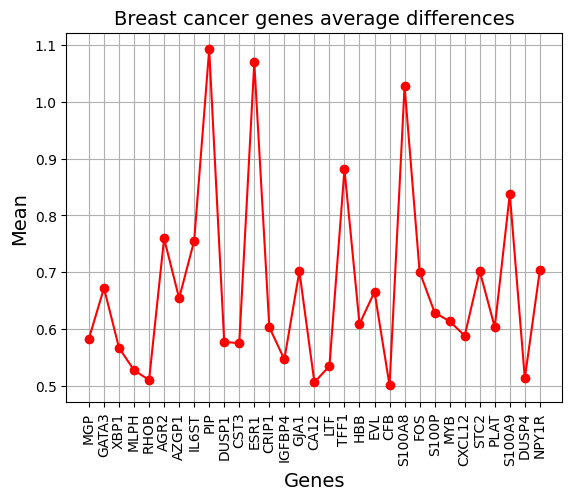

In [67]:
import matplotlib.pyplot as plt

plt.plot(significant_genes['Genes'], significant_genes['Means'], color='red', marker='o')
plt.title('Breast cancer genes average differences', fontsize=14)
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Mean', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [70]:
selected_genes= Z[["PIP","ESR1","TFF1","S100A8"]]

In [71]:
selected_genes

,PIP,ESR1,TFF1,S100A8
0,12.513096,6.957001,7.414155,11.095674
1,7.615952,6.908426,7.613591,8.527748
2,9.427238,9.785748,10.648086,7.408593
3,9.744537,10.476245,12.406460,8.287593
4,8.450953,7.198201,8.150826,13.051213
...,...,...,...,...
964,8.067013,6.943972,6.910970,10.407134
965,7.229395,6.993683,7.010578,8.729293
966,13.195257,9.823814,8.711872,9.700399
967,12.628617,12.285636,7.117297,6.598907


In [ ]:
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()